<h1 align="center">Oscilador armónico en un pozo de potencial infinito</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as ct

## 2. Planteamiento del problema

Sea una partícula cuántica con masa $m$ confinada en un pozo de potencial infinito de ancho $a$ y sometida a un potencial externo $U(x) = \frac{1}{2}m\omega^2x^2$. Tomando como funciones de onda base a las funciones propias de un pozo de potencial, obtenga la representación matricial para el hamiltoniano, así como sus valores y vectores propios.

## 3. Métodos y definiciones

In [2]:
a = 10   # nm -> ancho del pozo de potencial
ω = 0.4e15    # rad/s -> frecuencia angular del potencial armónico
m  = ct.m_e / ct.e * 1e-18 # eV/[c^2] -> masa del electrón, con velocidad de la luz c en nm/s
hbar = ct.physical_constants['Planck constant in eV/Hz'][0]
dpi = 300
np.set_printoptions(precision=3)

In [3]:
def matrix_elements(i, j, a=a, m=m, ω=ω):
    if i + 2 == j or i == j + 2:
        x2 = - a**2 * ( 1 - 1/max([i, j])**2) / (2 * np.pi**2)
        return m * ω ** 2 * x2 / 2
    if i + 4 == j or i == j + 4:
        x2 = a**2 * ( 1/4 - 1/max([i, j])**2) / (2 * np.pi**2)
        return m * ω ** 2 * x2 / 2
    if np.any(i != j):
        return 0
    p2 = hbar**2 * ( i * np.pi / a) ** 2
    x2 = a**2 * ( 1/12 - 0.5/(i * np.pi)**2 )
    return p2 / (2 * m) + m * ω ** 2 * x2 / 2

In [4]:
def psi_n(x, n, a=a):
    fun = np.sin if n % 2 == 0 else np.cos
    psi = np.zeros(len(x))
    k = np.abs(x) < a/2
    psi[k] = np.sqrt(2/a) * fun(n * np.pi * x[k] / a)
    return psi

## 4. Representación matricial y funciones de onda

Sea $|\Psi\rangle$ el vector de estado (ket) de la partícula cuántica confinada en el pozo y sometida al potencial externo $U(x)$, entonces, 

$$|\Psi_\eta \rangle = e^{-iE_\eta t/\hbar} |\eta \rangle \qquad (1)$$
$$\hat{H} |\eta \rangle = E_\eta|\eta \rangle \qquad (2)$$

Para la solución de este problema se ha seleccionado una base ortornormal $\{ |n \rangle \}$ tal que su representación en una base continua es una base de funciones de onda $\{\varphi_n(x) = \langle x | n\rangle\}$, que corresponden con las funciones propias del hamiltoniano de un pozo de potencial infinito, es decir,

$$\varphi_n(x) = \langle x | n\rangle = \sqrt{\frac{2}{a}} cos\left[ \frac{(2n'-1)\pi}{a} x \right] \delta_{n, 2n'-1} + \sqrt{\frac{2}{a}} sen\left[ \frac{2\pi n' }{a} x \right] \delta_{n, 2n'} \qquad (3)$$

$$\langle n' | n \rangle = (\varphi_{n'}, \varphi_n) = \int_{-a/2}^{a/2} { \varphi_{n'}^*(x) \varphi_n(x) dx } = \delta_{n',n} \qquad (4)$$

Donde $n$ y $n'$ son números enteros mayores que cero.

Como $\hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2} m \omega^2 x^2$ para $|x| < a/2$ e infinito para el resto del espacio, entonces, la partícula cuántica $| \eta \rangle$ está confinada a la región del espacio $|x| < a/2$. En términos de la base seleccionada, los elementos matriciales del hamiltoniano están dados por,

$$H_{n',n} = \frac{1}{2m} \langle n' | \hat{p}^2 | n \rangle +  \frac{1}{2} m \omega^2 \langle n' | x^2 | n \rangle \qquad (5a)$$

$$\langle n' | \hat{p}^2 | n \rangle = \hbar^2 \left( \frac{n\pi}{a} \right)^2 \delta_{n', n} \qquad (5b)$$

$$\langle n' | x^2 | n \rangle \approx a^2 \left[ \frac{1}{12} - \frac{1}{2\pi^2} \frac{1}{n^2}  \right] \delta_{n', n} - \frac{a^2}{2\pi^2} \left( 1- \frac{1}{\max\{n', n\}^2} \right) \delta_{n'\pm 2, n} + \frac{a^2}{2\pi^2} \left( \frac{1}{4} - \frac{1}{\max\{n', n\}^2} \right) \delta_{n' \pm 4, n} \qquad (5c)$$

Con la representación matricial $H=\{ \langle n' | \hat{H} | n \rangle \}$ se resuelve la ecuación secular $det(H - E I) = 0$ y se obtienen los vectores propios $\xi_\eta = \{ c_{\eta n} \}$ tales que $H\xi_\eta = E_\eta \xi_\eta$. Con los elementos de los vectores propios se encuentran las funciones de onda $\psi_\eta(x) = \langle x | \eta \rangle$, como una combinación lineal de las funciones de onda $\varphi_n(x)$,

$$\psi_\eta = \sum_n c_{\eta n} \varphi_n$$

In [5]:
N = 6
H = np.array( [ [ matrix_elements(i, j, a=a, m=m, ω=ω) for i in range(1,N+1,1)] for j in range(1,N+1,1)] )
E, eigen_func = np.linalg.eig(H)
index = np.argsort(E)
E = E[index]
eigen_func = eigen_func[:, index]
print('H = ', H)
print('Energía (eV):', E)

H =  [[ 1.635  0.    -2.048  0.     0.484  0.   ]
 [ 0.     3.808  0.    -2.16   0.     0.512]
 [-2.048  0.     4.87   0.    -2.212  0.   ]
 [ 0.    -2.16   0.     6.022  0.    -2.24 ]
 [ 0.484  0.    -2.212  0.     7.41   0.   ]
 [ 0.     0.512  0.    -2.24   0.     9.071]]
Energía (eV): [ 0.595  2.394  4.328  5.911  8.992 10.595]


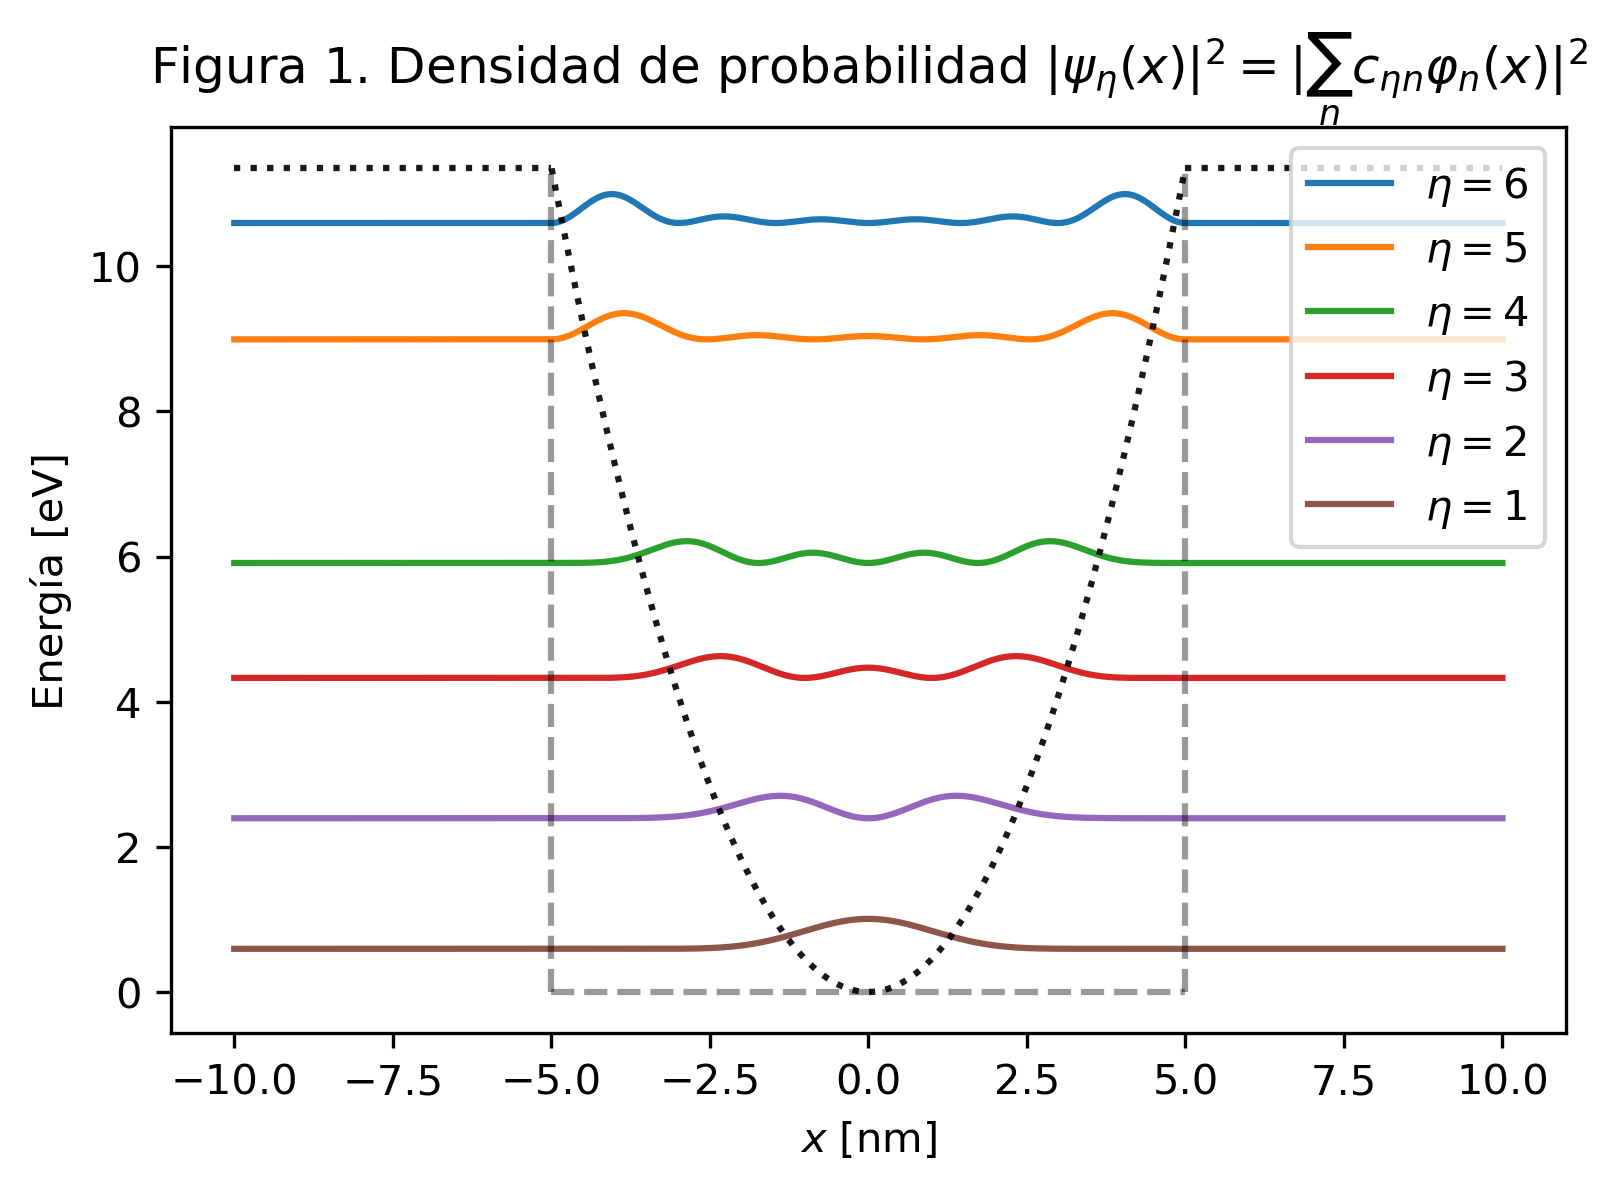

In [6]:
x = np.linspace(-a, a, 1000)
plt.figure(dpi=dpi)
for n in range(N, 0, -1):
    Psi = 0
    for i, c in enumerate(eigen_func[:, n-1]):
        Psi += c * psi_n(x, i+1, a=a)
    plt.plot(x, Psi**2 + E[n-1], label=r'$\eta=%d$' % n)
k = np.abs(x) < a/2
y = 0 * x
y[k] = m * ω ** 2 * x[k]**2 / 2
Emax = max([max(E), max(y)])
plt.plot(x[y>0], y[y>0], ':k', alpha=0.9)
plt.vlines([-a/2, a/2], 0, max(y), linestyles='dashed', colors='k', alpha=0.4)
if max(E) > max(y):
    plt.vlines([-a/2, a/2], max(y), max(E), linestyles='dotted', colors='k', alpha=0.9)
plt.hlines(0, -a/2, a/2, linestyles='dashed', colors='k', alpha=0.4)
plt.hlines(Emax, min(x), -a/2, linestyles='dotted', colors='k', alpha=0.9)
plt.hlines(Emax, a/2, max(x), linestyles='dotted', colors='k', alpha=0.9)
plt.ylabel('Energía [eV]')
plt.xlabel(r'$x$ [nm]')
plt.legend()
_ = plt.title(r'Figura 1. Densidad de probabilidad $|\psi_\eta(x)|^2 = \left| \sum_n c_{\eta n} \varphi_n(x) \right|^2$')

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. En la ecuación (1), ¿qué sentido físico tiene el elemento de fase $e^{iE_nt/\hbar}$?

5.1.2. Interprete la ecuación (2).

5.1.3. Con sus propias palabras explique el significado de la expresión: "para la solución de este problema se ha seleccionado una base ortonormal $\{ |n \rangle \}$ tal que su representación en una base continua es una base de funciones de onda $\{\psi_n(x) = \langle x | n\rangle\}$, que corresponden con las funciones propias del hamiltoniano de un pozo de potencial infinito."

5.1.4. Deduzca las ecuaciones (3) y (4).

5.1.5. Deduzca las ecuaciones (5a), (5b) y (5c). Se sugiere utilizar [*Sympy*](https://www.sympy.org/), [*WolframAlpha*](https://www.wolframalpha.com/), u otra herramienta para realizar integración simbólica. 

### 5.2. Segundo bloque de preguntas

5.2.1. En ciencias de la computación se suelen definir métodos donde se pasan parámetros propios del método con el mismo nombre de parámetros externos, como se hace en *matrix_elements(i, j, a=a, m=m, ω=ω)*. ¿Cuál es el propósito de pasar parámetros (como *a=a*) de esta manera?

5.2.2. Explique cómo el método *psi_n(x, n)* implementa la ecuación (3).

5.2.3. Verifique que las funciones de onda obtenidas con el método *psi_n(x, n)* cumple con las condiciones impuestas: debe ser cero para todo $|x| > a/2$ y se debe cumplir la ecuación (4).

5.2.4. Describa cómo se implementaron numéricamente los deltas de Kronecker de la ecuación (5).

5.2.5. Explique cómo, a partir de las ecuaciones (5a), (5b) y (5c), se obtuvo la representación matricial del hamiltoniano.

### 5.3. Tercer bloque de preguntas

5.3.1. Explique cómo se relaciona el vector de estado $|n\rangle$, su representación $\langle x | n \rangle$ y la función de onda $\varphi_n(x)$.  

5.3.2. Explique por qué la ecuación (5c) corresponde a una aproximación ($\approx$) en vez de una igualdad. ¿Cómo se calcularían los términos restantes?

5.3.3. En este *Worked Example* se obtuvo una representación matricial $H = \{ H_{ij} \} = \{ \langle i | \hat{H} | j \rangle \}$ para el hamiltoniano $\hat{H}$ a partir de las seis primeras $(N=6)$ funciones de onda $\varphi_n(x)$ de la base ortonormal seleccionada. Explique (a) cómo se obtuvieron las funciones de onda $\psi_\eta(x)$ que resuelven el problema, (b) qué limitaciones podría tener la escogencia de $N=6$ y (c) cómo se pueden (de ser el caso) sortear dichas limitaciones.

5.3.4. Describa cada uno de los elementos presentes en la Figura 1. Su descripción incluir, además de la identificación de cada elemento, la explicación del sentido físico de los mismos.

5.3.5. Realice representaciones gráficas donde muestre el efecto de variar el ancho $a$ del pozo de potencial y el parámetro $\omega$. Para cada gráfica, describa lo observado.

End!